In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [83]:
df_apple = pd.read_csv('AAPL.csv', parse_dates=['Date']).sort_values(by='Date')
df_tesla = pd.read_csv('TSLA.csv', parse_dates=['Date']).sort_values(by='Date')
def add_bollinger(df, field, winsize=7, factor=1.7):
    df['sma'] = df[field].rolling(winsize).mean().fillna(method='bfill')
    std = df[field].rolling(winsize).std().fillna(method='bfill')
    df['upperbol'] = df.sma + factor*std
    df['lowerbol'] = df.sma - factor*std

add_bollinger(df_apple, 'Close')
add_bollinger(df_tesla, 'Close')

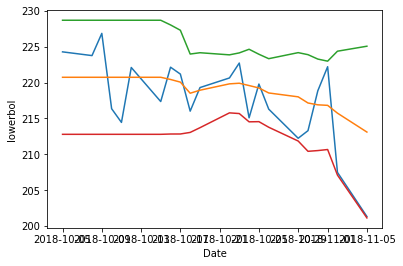

In [80]:
sns.lineplot(df_apple.Date, df_apple.Close)
sns.lineplot(df_apple.Date, df_apple.sma)
sns.lineplot(df_apple.Date, df_apple.upperbol)
sns.lineplot(df_apple.Date, df_apple.lowerbol)

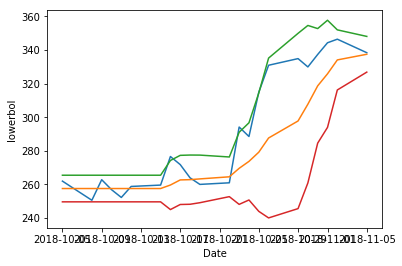

In [81]:
sns.lineplot(df_tesla.Date, df_tesla.Close)
sns.lineplot(df_tesla.Date, df_tesla.sma)
sns.lineplot(df_tesla.Date, df_tesla.upperbol)
sns.lineplot(df_tesla.Date, df_tesla.lowerbol)

In [84]:
def stuff(df):
    df['week'] = df.Date.dt.week
    df['dayofweek'] = df.Date.dt.dayofweek
    df['even'] = df_apple.week % 2
    df2 = df.groupby(['dayofweek', 'even']).Close.mean().reset_index()
    df['close_norm'] = df.Close / df.groupby('even').Close.transform(np.max)
    return df.sort_values(by='Date')

df_apple = stuff(df_apple)
df_tesla = stuff(df_tesla)

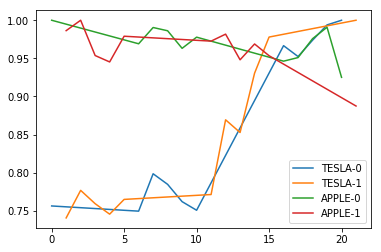

In [91]:
for n,g in df_tesla.groupby('even'):
    sns.lineplot(data=g.close_norm, label=f'TESLA-{n}')
for n,g in df_apple.groupby('even'):
    sns.lineplot(data=g.close_norm, label=f'APPLE-{n}')